In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from cmath import phase
import warnings

In [2]:
def points_to_func(points):
    t = points[:,0]
    f_t = points[:,1]
    z = np.polyfit(t,f_t,len(f_t)-1)
    p = np.poly1d(z)
    return  p

In [3]:
def fourier(f,w):
    #print(f)
    num = sum(quad(lambda t: f(t)*np.exp(-1j*2*np.pi*w*t),0,1,complex_func=True))
    #print('Done Integrate')
    return num

In [4]:
def fourier_component(x,y,w):
    f = points_to_func(x)
    #print('Done for x')
    g = points_to_func(y)
    #print('Done for y')
    #print('Done for f+ig')
    return fourier(lambda t: f(t)+1j*g(t),w)

NameError: name 'points' is not defined

In [27]:
def import_points(file="points.txt"):
    points = np.loadtxt(file)
    x = np.array([points[:,0],points[:,1][::-1]]).T
    print(x)
    y = np.array([points[:,0],-points[:,2][::-1]]).T
    return x,y

In [28]:
x, y = import_points()


[[0.00000000e+00 1.97000000e+02]
 [4.16666667e-03 1.93000000e+02]
 [8.33333333e-03 1.90000000e+02]
 [1.25000000e-02 1.90000000e+02]
 [1.66666667e-02 1.88000000e+02]
 [2.08333333e-02 1.88000000e+02]
 [2.50000000e-02 1.88000000e+02]
 [2.91666667e-02 1.85000000e+02]
 [3.33333333e-02 1.85000000e+02]
 [3.75000000e-02 1.81000000e+02]
 [4.16666667e-02 1.81000000e+02]
 [4.58333333e-02 1.78000000e+02]
 [5.00000000e-02 1.78000000e+02]
 [5.41666667e-02 1.78000000e+02]
 [5.83333333e-02 1.75000000e+02]
 [6.25000000e-02 1.75000000e+02]
 [6.66666667e-02 1.75000000e+02]
 [7.08333333e-02 1.75000000e+02]
 [7.50000000e-02 1.75000000e+02]
 [7.91666667e-02 1.75000000e+02]
 [8.33333333e-02 1.75000000e+02]
 [8.75000000e-02 1.75000000e+02]
 [9.16666667e-02 1.75000000e+02]
 [9.58333333e-02 1.75000000e+02]
 [1.00000000e-01 1.75000000e+02]
 [1.04166667e-01 1.75000000e+02]
 [1.08333333e-01 1.75000000e+02]
 [1.12500000e-01 1.75000000e+02]
 [1.16666667e-01 1.75000000e+02]
 [1.20833333e-01 1.78000000e+02]
 [1.250000

In [29]:
n = 10
w_range = np.arange(-n,n+1)
nums = np.array([fourier_component(x,y,w) for w in w_range])

/tmp/ipykernel_216405/1525519299.py:4: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(t,f_t,len(f_t)-1)
/tmp/ipykernel_216405/1525519299.py:4: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(t,f_t,len(f_t)-1)
/home/amanpc/.local/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:447: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
/home/amanpc/.local/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:450: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
/tmp/ipykernel_216405/1525519299.py:4: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(t,f_t,len(f_t)-1)
/tmp/ipykerne

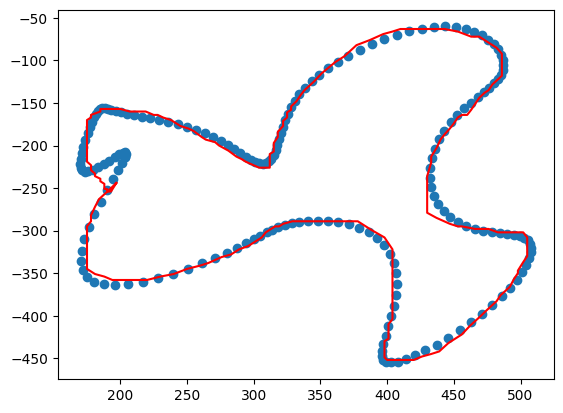

In [30]:
t_ = np.linspace(0,1,200)
plt.plot(x[:,1],y[:,1],color ='r')
plt.scatter([sum(nums*np.exp(1j*2*np.pi*w_range*t)).real for t in t_],[sum(nums*np.exp(1j*2*np.pi*w_range*t)).imag for t in t_])